In [1]:
#Handle missing value
#Do pre processing
#standard scaler 
#Build model with multiple models
#Hyper parameter tuning
#Final output :)

In [77]:
import pandas as pd
import numpy as np
#graphing toold
import matplotlib.pyplot as plt
import seaborn as sns

#Preprocessor and pipeline to avoid the data loss
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

#Cross validation technique(Holdout approach)
from  sklearn.model_selection import train_test_split

#All these are best models for the training the train and test data
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import *


In [3]:
car_df = pd.read_csv(r'C:\Users\manoj.n.d\Documents\Data Scientist work\CarPrice_Assignment.csv')
car_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
#Lets do the data preprocessing
car_df.isnull().sum()
#Cool no column is null

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [5]:
car_df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [6]:
car_df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [7]:
cars_df = car_df[['CarName','fueltype','price','citympg','highwaympg','horsepower','enginetype']]
cars_df.head()

,CarName,fueltype,price,citympg,highwaympg,horsepower,enginetype
0,alfa-romero giulia,gas,13495.0,21,27,111,dohc
1,alfa-romero stelvio,gas,16500.0,21,27,111,dohc
2,alfa-romero Quadrifoglio,gas,16500.0,19,26,154,ohcv
3,audi 100 ls,gas,13950.0,24,30,102,ohc
4,audi 100ls,gas,17450.0,18,22,115,ohc


In [8]:
cars_df.shape

(205, 7)

<AxesSubplot:xlabel='enginetype', ylabel='count'>

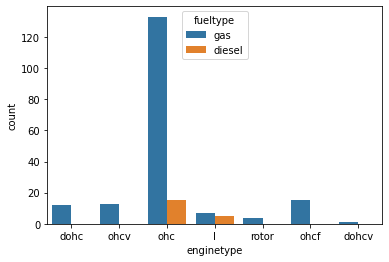

In [9]:
#Lets see the insites

sns.countplot(x='enginetype', data=cars_df, hue='fueltype')

<AxesSubplot:xlabel='horsepower', ylabel='price'>

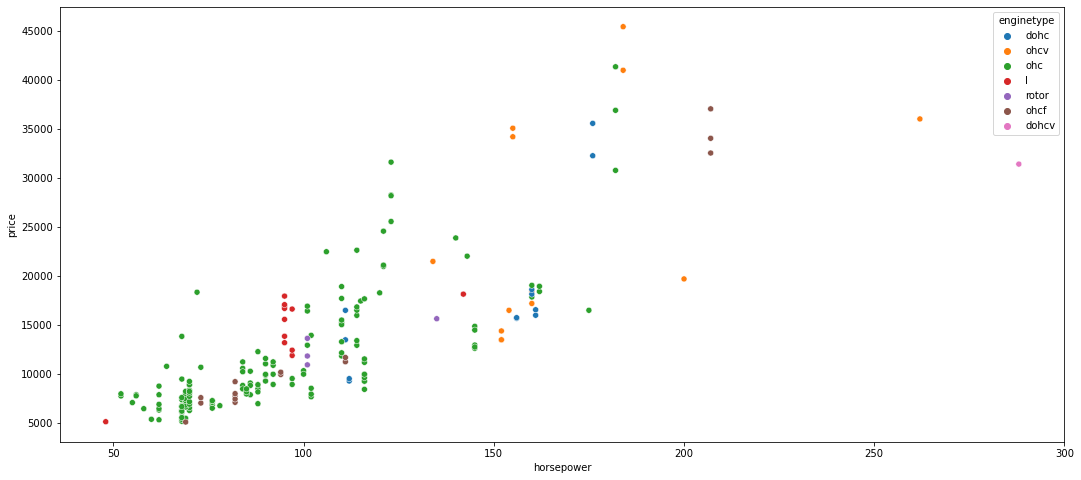

In [10]:
plt.figure(figsize=(18,8))
sns.scatterplot(x='horsepower', y='price', data=cars_df,hue='enginetype')

In [11]:
cars_df['fueltype'].value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

In [12]:
#Lets do the encoding
cars_df.replace({'fueltype':{'gas':1,
                                      'diesel':0}}, inplace=True)

C:\Users\manoj.n.d\Anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [13]:
cars_df.head(2)

,CarName,fueltype,price,citympg,highwaympg,horsepower,enginetype
0,alfa-romero giulia,1,13495.0,21,27,111,dohc
1,alfa-romero stelvio,1,16500.0,21,27,111,dohc


In [14]:
#Lets do the one hot encoding for the enginetype
cars_df['enginetype'].value_counts()

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64

In [15]:
#Did one hot encoding 
engine = pd.get_dummies(cars_df['enginetype'], drop_first=True,prefix='e')

In [16]:
cars_df.head()

,CarName,fueltype,price,citympg,highwaympg,horsepower,enginetype
0,alfa-romero giulia,1,13495.0,21,27,111,dohc
1,alfa-romero stelvio,1,16500.0,21,27,111,dohc
2,alfa-romero Quadrifoglio,1,16500.0,19,26,154,ohcv
3,audi 100 ls,1,13950.0,24,30,102,ohc
4,audi 100ls,1,17450.0,18,22,115,ohc


In [17]:
cars_backup = cars_df

In [18]:
final_cars = pd.concat([cars_df,engine],axis=1)

In [19]:
final_cars.shape

(205, 13)

In [20]:
final_cars.drop('enginetype', axis=1, inplace=True)
final_cars.head()

,CarName,fueltype,price,citympg,highwaympg,horsepower,e_dohcv,e_l,e_ohc,e_ohcf,e_ohcv,e_rotor
0,alfa-romero giulia,1,13495.0,21,27,111,0,0,0,0,0,0
1,alfa-romero stelvio,1,16500.0,21,27,111,0,0,0,0,0,0
2,alfa-romero Quadrifoglio,1,16500.0,19,26,154,0,0,0,0,1,0
3,audi 100 ls,1,13950.0,24,30,102,0,0,1,0,0,0
4,audi 100ls,1,17450.0,18,22,115,0,0,1,0,0,0


In [21]:
x = final_cars.drop(['CarName','price'], axis=1)
y=final_cars['price']

<AxesSubplot:>

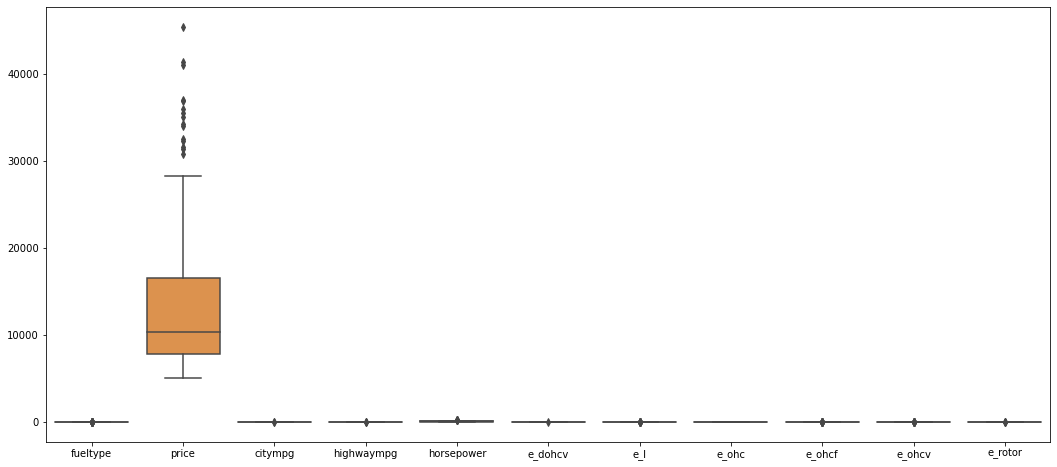

In [47]:
#Lets see the box plots
plt.figure(figsize=(18,8))
sns.boxplot(data=final_cars)

<AxesSubplot:xlabel='horsepower', ylabel='price'>

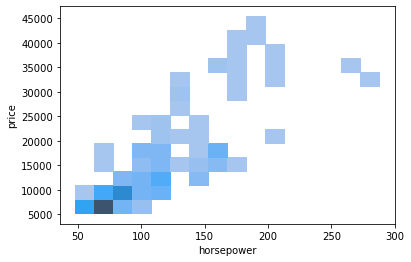

In [52]:
sns.histplot(x ='horsepower',y='price', data = final_cars)

In [71]:
def train_test_split_model(model,x=x,y=y):
    num = 30
    for i in range(5,35,5):
        x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=i,test_size=0.2)
        pipe = make_pipeline(StandardScaler(), RandomForestRegressor())
        reg_model=pipe.fit(x_train,y_train)
        #reg_model = model.fit(x_train,y_train)
        test_predict =  reg_model.predict(x_test)
        print(f'Random_State is:{i}')
        print(f'MAE is: {mean_absolute_error(test_predict,y_test)}')
        print(f'MSE is :{mean_squared_error(test_predict, y_test)}')
        mse = mean_squared_error(test_predict, y_test)
        print(f'RMSE is:{np.sqrt(mse)}')
        print('*'*30)
        
        

In [38]:
np.sqrt(25)

5.0

In [72]:
model1=LinearRegression()
train_test_split_model(model1)

Random_State is:5
MAE is: 1312.7115244356728
MSE is :3967177.7296269047
RMSE is:1991.7775301541346
******************************
Random_State is:10
MAE is: 2077.339001560585
MSE is :9453508.854952654
RMSE is:3074.655892120719
******************************
Random_State is:15
MAE is: 1597.791493564382
MSE is :5694564.51446772
RMSE is:2386.328668576003
******************************
Random_State is:20
MAE is: 1224.1099526033092
MSE is :2397003.7774035474
RMSE is:1548.2260097942894
******************************
Random_State is:25
MAE is: 1968.1514884196179
MSE is :11959598.717524799
RMSE is:3458.2652757596256
******************************
Random_State is:30
MAE is: 1408.2512179906548
MSE is :4817581.977813951
RMSE is:2194.899081464556
******************************


In [73]:
model2=RandomForestRegressor()
train_test_split_model(model2)

Random_State is:5
MAE is: 1286.3677550619973
MSE is :3676009.0271995855
RMSE is:1917.292107947974
******************************
Random_State is:10
MAE is: 2040.221377535594
MSE is :9038338.38603087
RMSE is:3006.382940683184
******************************
Random_State is:15
MAE is: 1698.2846237666015
MSE is :6839162.147878877
RMSE is:2615.1791808361577
******************************
Random_State is:20
MAE is: 1180.2504738143846
MSE is :2315860.51185869
RMSE is:1521.7951609394381
******************************
Random_State is:25
MAE is: 2069.58020268415
MSE is :13340769.746878183
RMSE is:3652.5018476214605
******************************
Random_State is:30
MAE is: 1411.2581220736718
MSE is :4819710.824320715
RMSE is:2195.3839810658897
******************************


In [74]:
model3=DecisionTreeRegressor()
train_test_split_model(model3)

Random_State is:5
MAE is: 1308.0698765658733
MSE is :3723118.8127893005
RMSE is:1929.538497358708
******************************
Random_State is:10
MAE is: 1985.909613748678
MSE is :8937562.099790776
RMSE is:2989.5755718480805
******************************
Random_State is:15
MAE is: 1697.0837791206077
MSE is :6778429.6648292905
RMSE is:2603.541754001516
******************************
Random_State is:20
MAE is: 1217.4949181101642
MSE is :2404513.1378492834
RMSE is:1550.6492633246512
******************************
Random_State is:25
MAE is: 2111.778902584283
MSE is :14770072.774850497
RMSE is:3843.185238165147
******************************
Random_State is:30
MAE is: 1443.603326229103
MSE is :4898121.3560783025
RMSE is:2213.1699790296952
******************************


In [75]:
model4 = XGBRegressor()
train_test_split_model(model4)

Random_State is:5
MAE is: 1255.3076053915465
MSE is :3438574.55686769
RMSE is:1854.3393855677255
******************************
Random_State is:10
MAE is: 1980.9003828850268
MSE is :9026517.046932375
RMSE is:3004.416257267354
******************************
Random_State is:15
MAE is: 1670.6448003547944
MSE is :6480695.258247504
RMSE is:2545.720970225823
******************************
Random_State is:20
MAE is: 1215.7300106422435
MSE is :2370850.1535098064
RMSE is:1539.7565241004197
******************************
Random_State is:25
MAE is: 2078.1261390884183
MSE is :13204368.568927381
RMSE is:3633.7815796945447
******************************
Random_State is:30
MAE is: 1414.8810533998796
MSE is :4593360.6220297795
RMSE is:2143.2126870727925
******************************


In [76]:
model5 = GradientBoostingRegressor()
train_test_split_model(model5)

Random_State is:5
MAE is: 1311.0410875211244
MSE is :3738638.694988699
RMSE is:1933.5559715169093
******************************
Random_State is:10
MAE is: 2101.46374429727
MSE is :10491113.94245831
RMSE is:3238.9989105367586
******************************
Random_State is:15
MAE is: 1721.4021877861296
MSE is :7132128.853354579
RMSE is:2670.60458573608
******************************
Random_State is:20
MAE is: 1212.778538482601
MSE is :2345484.5203216886
RMSE is:1531.49747643334
******************************
Random_State is:25
MAE is: 2014.2510730064785
MSE is :12899419.880733473
RMSE is:3591.5762390256277
******************************
Random_State is:30
MAE is: 1378.0895169107857
MSE is :4733227.43684896
RMSE is:2175.598179087526
******************************


In [78]:
#Lets save the model
import joblib

In [79]:
joblib.dump(model4,'xgboost_project6.pkl')

['xgboost_project6.pkl']

In [80]:
print(np.arange(6,8))

[6 7]
